### CUSTOMER CHURN PREDICTION

### Introduction:
Customer churn prediction is a critical task for businesses operating in subscription-based industries such as telecommunications, software as a service (SaaS), and retail. Churn refers to the phenomenon where customers discontinue their relationship with a company or stop using its services. It is essential for businesses to identify and understand the factors that contribute to churn in order to take proactive measures to retain customers and maximize revenue.









### Business Understanding:
In this project, we aim to develop a machine learning model to predict customer churn for a telecommunications company. By analyzing historical customer data, we seek to identify patterns and trends that are indicative of potential churn. The model will help the company anticipate which customers are likely to churn in the future, allowing them to implement targeted retention strategies.

Understanding the factors influencing churn is crucial for businesses to make informed decisions and allocate resources effectively. By predicting churn accurately, companies can take proactive steps such as offering incentives, personalized promotions, or improving customer service to retain customers and mitigate revenue loss. Additionally, reducing churn can lead to increased customer satisfaction, loyalty, and long-term profitability for the business.

Through this project, we aim to provide actionable insights to the telecommunications company that can help them reduce churn rates, improve customer retention, and ultimately enhance business performance.




 Null hypothesis :
 
    1. There is a dominant attribute that affects churn
   
 
Alternative hypothesis:

    1. There is no dominant attribute that affects churn
   
 
   ### Analytical questions
 
- 1.What is the total churn rate?
- 2.How does the different boolean attributes affect the churn?
- 3.How does the different non-boolean attributes affect the churn?
- 4.How does the different numerical attributes affect the churn?
- 5.How does tenure affect the churn?
- 6.How does the type of internet service affect churn?
- 7.How does the type of contract affect the churn?
- 8.How does the type of payment method affect the churn?
 
 

### DATA UNDERSTANDING

| Variable         | Description                                       | Data Type | Possible Values                          |
|------------------|---------------------------------------------------|-----------|------------------------------------------|
| customerID       | Unique identifier for each customer               | String    |                                          |
| gender           | Gender of the customer                            | String    | 'Male', 'Female'                        |
| SeniorCitizen    | Indicates if the customer is a senior citizen     | Boolean   | True (1), False (0)                     |
| Partner          | Indicates if the customer has a partner           | Boolean   | True (1), False (0)                     |
| Dependents       | Indicates if the customer has dependents          | Boolean   | True (1), False (0)                     |
| tenure           | Number of months the customer has been with the company | Integer |                                          |
| PhoneService     | Indicates if the customer has phone service       | Boolean   | True (1), False (0)                     |
| MultipleLines    | Indicates if the customer has multiple lines      | String    | 'Yes', 'No', 'No phone service'        |
| InternetService  | Type of internet service                          | String    | 'DSL', 'Fiber optic', 'No'             |
| OnlineSecurity   | Indicates if the customer has online security     | String    | 'Yes', 'No', 'No internet service'     |
| DeviceProtection | Indicates if the customer has device protection   | String    | 'Yes', 'No', 'No internet service'     |
| TechSupport      | Indicates if the customer has tech support        | String    | 'Yes', 'No', 'No internet service'     |
| StreamingTV      | Indicates if the customer has streaming TV        | String    | 'Yes', 'No', 'No internet service'     |
| StreamingMovies  | Indicates if the customer has streaming movies    | String    | 'Yes', 'No', 'No internet service'     |
| Contract         | Type of contract                                  | String    | 'Month-to-month', 'One year', 'Two year' |
| PaperlessBilling | Indicates if the customer has paperless billing  | Boolean   | True (1), False (0)                     |
| PaymentMethod    | Payment method                                    | String    | 'Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)' |
| MonthlyCharges   | Monthly charges                                   | Float     |                                          |
| TotalCharges     | Total charges                                     | Float     |                                          |
| Churn            | Indicates if the customer churned                | Boolean   | True (1), False (0)                     |


#### Data Connection

In [164]:
#importing packages
import pyodbc 
#import the dotenv_values function from the dotenv package    
from dotenv import dotenv_values 
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



warnings.filterwarnings('ignore')


In [165]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

In [166]:
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER_NAME")
database = environment_variables.get("DATABASE_NAME")
username = environment_variables.get("USER")
password = environment_variables.get("PASSWORD")


In [167]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [168]:

# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

### Load First Dataset

In [169]:
query = "Select * from LP2_Telco_churn_first_3000"




In [170]:
df1 = pd.read_sql(query, connection)



In [171]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


### Load Second Dataset

In [172]:


# Assuming the CSV file is located in the data directory
csv_file_path = r"C:\Users\User\Desktop\Azubi_Projects\Customer_Churn-Prediction\Data\LP2_Telco-churn-second-2000.csv"


# Load the CSV file into a pandas DataFrame
df2 = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df2.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


### Concat Dataset

In [173]:

# Concatenate them vertically (along the rows)
full_data = pd.concat([df1, df2])

# If you want to reset the index after concatenating
full_data.reset_index(drop=True, inplace=True)

full_data.head(23)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
5,9305-CDSKC,Female,0,False,False,8,True,True,Fiber optic,False,...,True,False,True,True,Month-to-month,True,Electronic check,99.650002,820.5,True
6,1452-KIOVK,Male,0,False,True,22,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Credit card (automatic),89.099998,1949.400024,False
7,6713-OKOMC,Female,0,False,False,10,False,None,DSL,True,...,False,False,False,False,Month-to-month,False,Mailed check,29.750000,301.899994,False
8,7892-POOKP,Female,0,True,False,28,True,True,Fiber optic,False,...,True,True,True,True,Month-to-month,True,Electronic check,104.800003,3046.050049,True
9,6388-TABGU,Male,0,False,True,62,True,False,DSL,True,...,False,False,False,False,One year,False,Bank transfer (automatic),56.150002,3487.949951,False


### Clean Dataset

In [174]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [175]:
full_data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [176]:
#replacing missing values with the mean for numerical variables and the mode for categorical variables:

def impute_missing_values(df):
    """
    Impute missing values in a DataFrame.

    Parameters:
    - df: pandas DataFrame containing the dataset with missing values.

    Returns:
    - df: pandas DataFrame with missing values imputed.
    """
    # Iterate through each column
    for column in df.columns:
        # Check if the column has missing values
        if df[column].isnull().sum() > 0:
            # Check if the column is numerical or categorical
            if pd.api.types.is_numeric_dtype(df[column]):
                # Impute missing values with the mean
                df[column].fillna(df[column].mean(), inplace=True)
            else:
                # Impute missing values with the mode (most frequent value)
                mode_value = df[column].mode()[0]
                df[column].fillna(mode_value, inplace=True)
    
    return df

# Example usage:
full_data = impute_missing_values(full_data)
full_data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,False,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,False,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [177]:
full_data.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [178]:
full_data['InternetService']

0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
5038            DSL
5039    Fiber optic
5040            DSL
5041    Fiber optic
5042    Fiber optic
Name: InternetService, Length: 5043, dtype: object

In [179]:
# function to handle the values and convert them to boolean values 'Yes' and 'No' only:

def convert_to_yes_no(df, column_name):
    
    # Define mapping for conversion
    mapping = {True: 'Yes', False: 'No', 'True': 'Yes', 'False': 'No', 'Yes': 'Yes', 'No': 'No','No internet service': 'No','No phone service': 'No','DSL':'Yes','Fiber optic': 'Yes'}
    
    # Convert column values using the mapping
    df[column_name] = df[column_name].map(mapping)
    
    return df



# Example usage:
full_data = convert_to_yes_no(full_data, 'Partner')
full_data = convert_to_yes_no(full_data, 'Dependents')
full_data = convert_to_yes_no(full_data,'PhoneService')
full_data = convert_to_yes_no(full_data,'MultipleLines')
full_data = convert_to_yes_no(full_data,'OnlineSecurity')
full_data = convert_to_yes_no(full_data,'DeviceProtection')
full_data = convert_to_yes_no(full_data,'TechSupport')
full_data = convert_to_yes_no(full_data,'StreamingTV')
full_data = convert_to_yes_no(full_data,'StreamingMovies')
full_data = convert_to_yes_no(full_data,'PaperlessBilling')
full_data = convert_to_yes_no(full_data,'InternetService')
full_data = convert_to_yes_no(full_data,'Churn')



In [180]:
full_data.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [181]:
full_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,Yes,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [182]:
#convert 'No' to False and 'Yes' to True for all columns in the DataFrame:
def convert_yes_no_to_boolean(df):
    
    # Define mapping for conversion
    mapping = {'No': False, 'Yes': True}

    # Iterate through each column in the DataFrame
    for column in df.columns:
        # Check if the column contains 'No'/'Yes' values
        if set(df[column].unique()) == {'No', 'Yes'}:
            # Convert 'No'/'Yes' values to False/True
            df[column] = df[column].map(mapping)

    return df

# Example usage:
full_data= convert_yes_no_to_boolean(full_data)
full_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,False,True,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,True,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,True,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,False,True,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,True,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [183]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   bool   
 4   Dependents        5043 non-null   bool   
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   bool   
 7   MultipleLines     5043 non-null   bool   
 8   InternetService   5043 non-null   bool   
 9   OnlineSecurity    5043 non-null   bool   
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   bool   
 12  TechSupport       5043 non-null   bool   
 13  StreamingTV       5043 non-null   bool   
 14  StreamingMovies   5043 non-null   bool   
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   bool   


In [184]:
def convert_boolean_to_numeric(df):
  
    # Iterate through each column in the DataFrame
    for column in df.columns:
        # Check if the column contains boolean values
        if df[column].dtype == 'bool':
            # Convert True to 1 and False to 0
            df[column] = df[column].astype(int)

    return df

# Example usage:
full_data = convert_boolean_to_numeric(full_data)
full_data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.850000,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,One year,0,Mailed check,56.950001,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.849998,108.150002,1
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.299999,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.699997,151.649994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,1,1,1,One year,1,Mailed check,84.800000,1990.5,0
5039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,0,1,1,One year,1,Credit card (automatic),103.200000,7362.9,0
5040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.600000,346.45,0
5041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.400000,306.6,1


In [185]:
def clean_and_convert_object_to_float(df, columns):
   
    # Iterate through each column in the list of columns
    for column in columns:
        # Check if the column contains numerical values
        if df[column].dtype == 'object':
            # Clean the column by removing non-numeric values and converting to float
            df[column] = pd.to_numeric(df[column], errors='coerce')
    
    return df

# Example usage:
full_data= clean_and_convert_object_to_float(full_data, ['TotalCharges'])
full_data= clean_and_convert_object_to_float(full_data, ['MonthlyCharges'])
full_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.850000,29.850000,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,One year,0,Mailed check,56.950001,1889.500000,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.849998,108.150002,1
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.299999,1840.750000,0
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.699997,151.649994,1


In [186]:
object_columns = full_data.select_dtypes('object').columns
object_columns

Index(['customerID', 'gender', 'OnlineBackup', 'Contract', 'PaymentMethod'], dtype='object')

In [187]:
binary_columns = full_data.select_dtypes(include=['bool', 'int']).columns
binary_columns 

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'Churn'],
      dtype='object')

In [188]:
float_columns = full_data.select_dtypes('float').columns
float_columns

Index(['MonthlyCharges', 'TotalCharges'], dtype='object')

In [189]:
full_data.select_dtypes('number').columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 1. EDA


##### 1.1 Visualization of the distribution of numerical features  using histograms or box plots. 

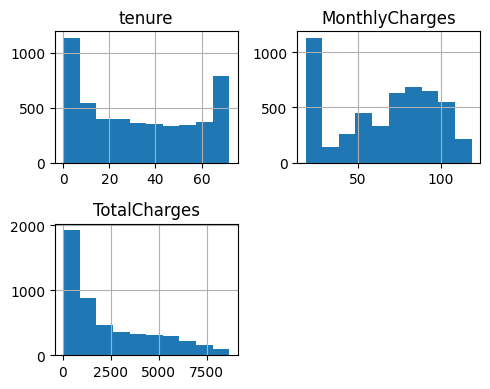

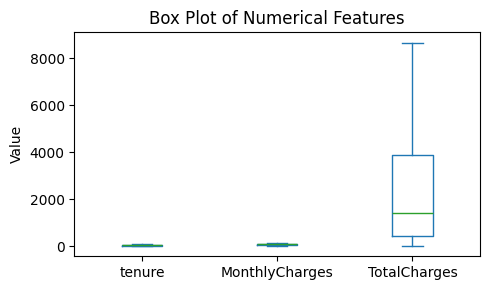

In [190]:




df = pd.DataFrame(full_data)

# Plot histograms for numerical features
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df[numerical_features].hist(figsize=(5, 4))
plt.tight_layout()
plt.show()

# Plot box plots for numerical features
df[numerical_features].plot(kind="box", figsize=(5, 3))
plt.title("Box Plot of Numerical Features")
plt.ylabel("Value")
plt.tight_layout()
plt.show()


##### 2.1 Exploration of categorical features 

In [191]:
# Explore categorical features using value_counts()
categorical_features = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", 
                        "MultipleLines", "InternetService", "OnlineSecurity", "DeviceProtection", 
                        "TechSupport", "StreamingTV", "StreamingMovies", "Contract", 
                        "PaperlessBilling", "PaymentMethod", "Churn"]

for feature in categorical_features:
    print(full_data[feature].value_counts())
    print( "="*20)


gender
Male      2559
Female    2484
Name: count, dtype: int64
SeniorCitizen
0    4224
1     819
Name: count, dtype: int64
Partner
0    2585
1    2458
Name: count, dtype: int64
Dependents
0    3482
1    1561
Name: count, dtype: int64
PhoneService
1    4554
0     489
Name: count, dtype: int64
MultipleLines
0    2913
1    2130
Name: count, dtype: int64
InternetService
1    3963
0    1080
Name: count, dtype: int64
OnlineSecurity
0    3587
1    1456
Name: count, dtype: int64
DeviceProtection
0    3299
1    1744
Name: count, dtype: int64
TechSupport
0    3552
1    1491
Name: count, dtype: int64
StreamingTV
0    3098
1    1945
Name: count, dtype: int64
StreamingMovies
1    2633
0    2410
Name: count, dtype: int64
Contract
Month-to-month    2744
Two year          1244
One year          1055
Name: count, dtype: int64
PaperlessBilling
1    2996
0    2047
Name: count, dtype: int64
PaymentMethod
Electronic check             1700
Mailed check                 1128
Bank transfer (automatic)    1125


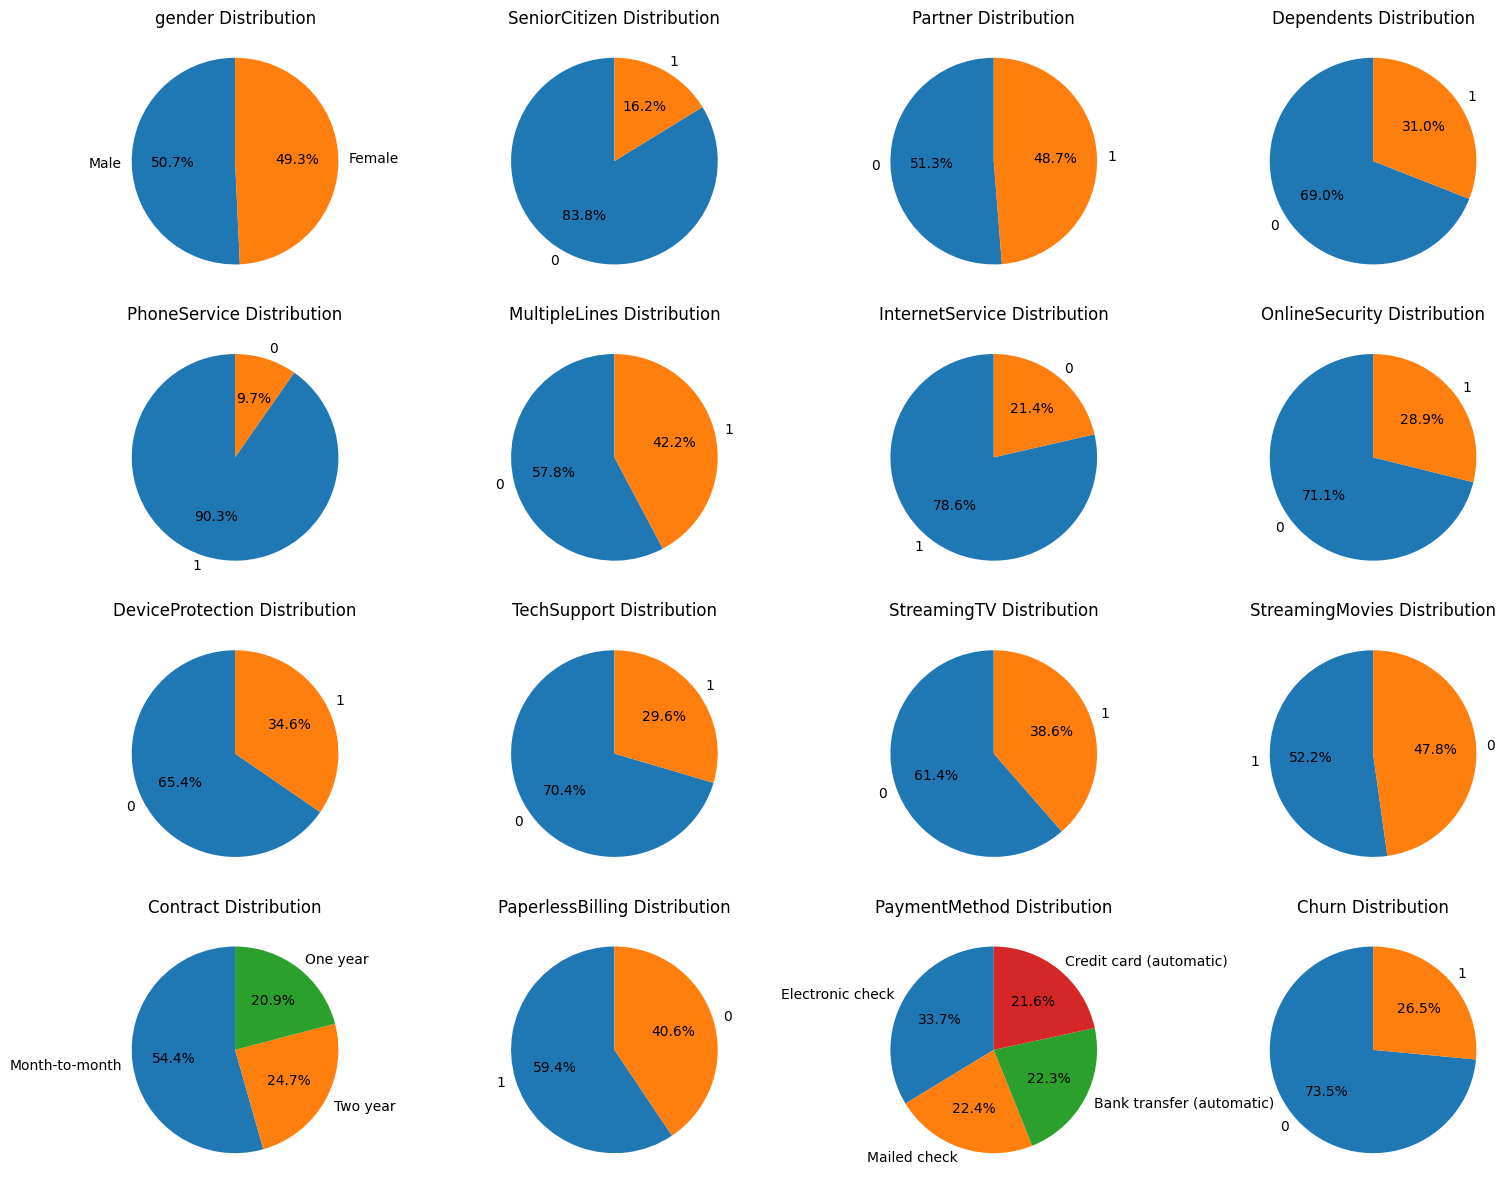

In [192]:
import matplotlib.pyplot as plt

# Define categorical features
categorical_features = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", 
                        "MultipleLines", "InternetService", "OnlineSecurity", "DeviceProtection", 
                        "TechSupport", "StreamingTV", "StreamingMovies", "Contract", 
                        "PaperlessBilling", "PaymentMethod", "Churn"]

# Plot pie charts for categorical features
plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    feature_counts = df[feature].value_counts()
    plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"{feature} Distribution")
plt.tight_layout()
plt.show()



##### 3.1 Understanding the relationship between different attributes and churn

We will use appropriate plots and charts to understand the relationship between different attributes and churn. Below are the visualizations for each question:

- Total Churn Rate:
Plot a pie chart showing the distribution of churn (True/False).

- Effect of Boolean Attributes on Churn:
Generate countplots for each boolean attribute (e.g., Partner, Dependents) based on churn status.

- Effect of Non-Boolean Attributes on Churn:
Generate countplots or bar plots for each non-boolean attribute (e.g., InternetService, Contract, PaymentMethod) based on churn status.

- Effect of Numerical Attributes on Churn:
Create box plots or histograms for numerical attributes (e.g., MonthlyCharges, TotalCharges) grouped by churn status.

- Effect of Tenure on Churn:
Plot a line chart or box plot showing the distribution of tenure for churned and non-churned customers.

- Effect of Internet Service Type on Churn:
Generate a countplot or pie chart showing the distribution of churn for each type of Internet service.

- Effect of Contract Type on Churn:
Create a countplot or pie chart displaying the distribution of churn for each type of contract.

- Effect of Payment Method on Churn:
Generate a countplot or pie chart showing the distribution of churn for each payment method.

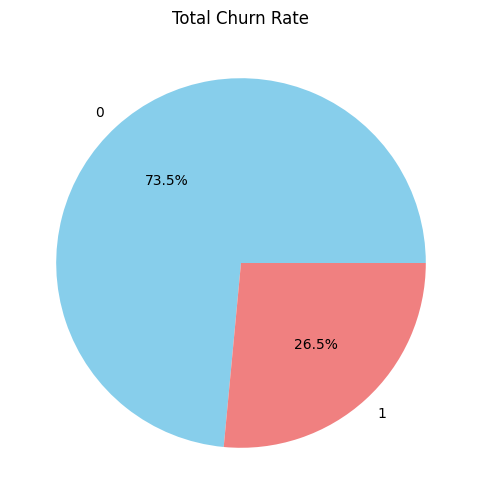

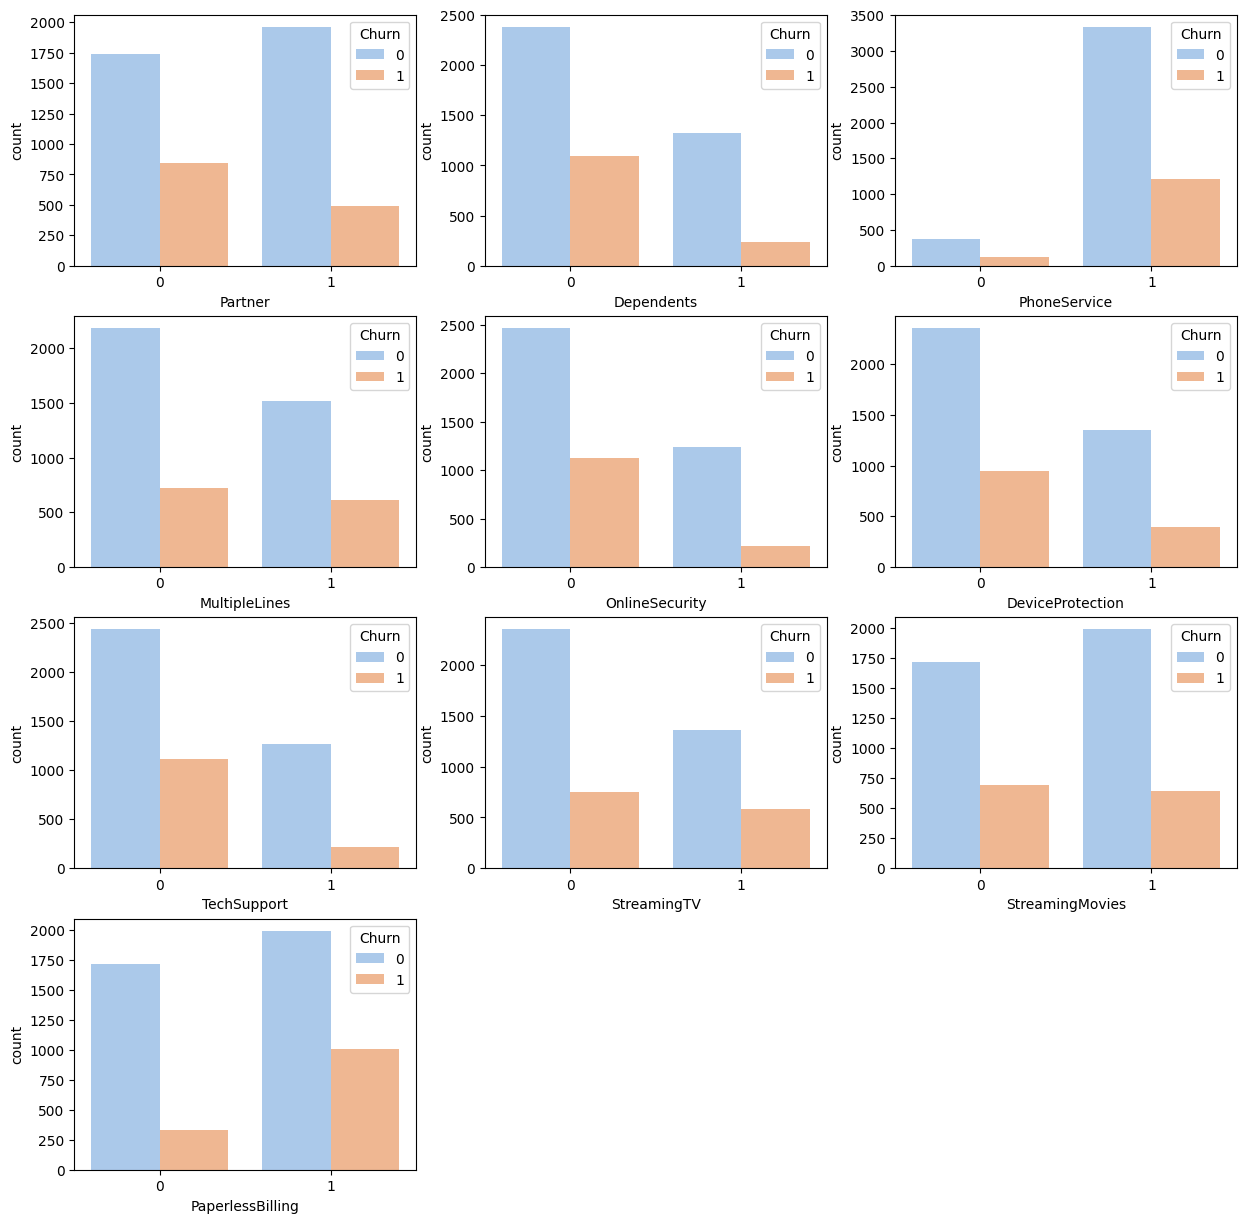

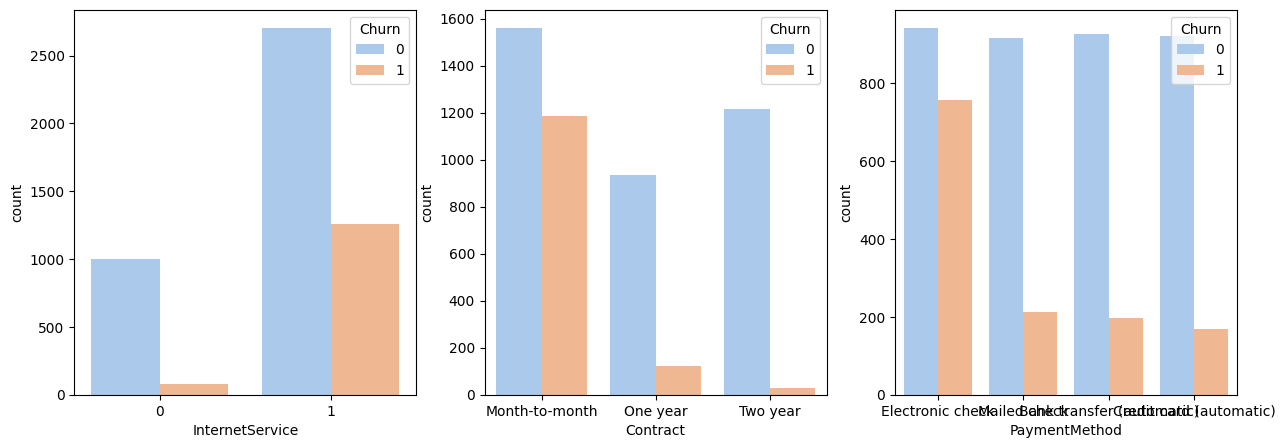

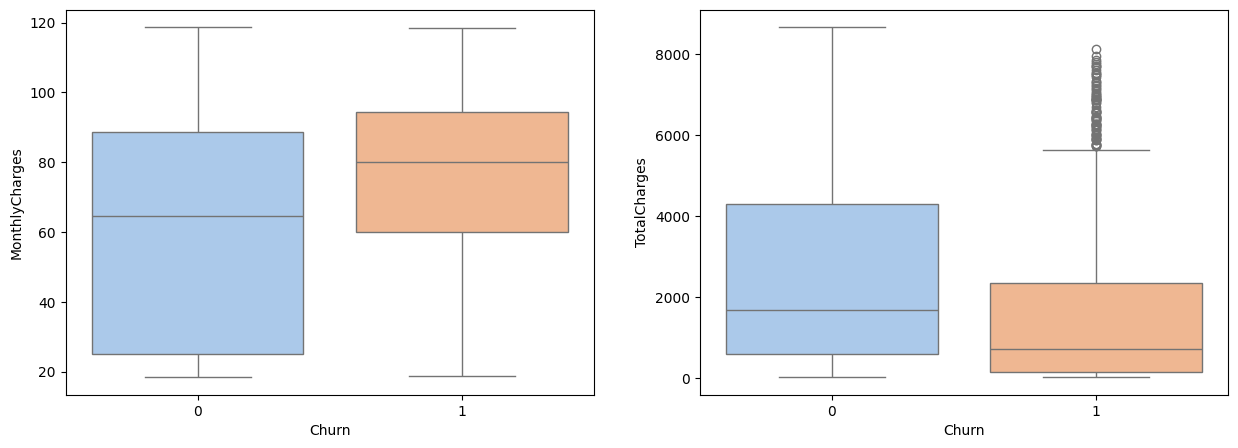

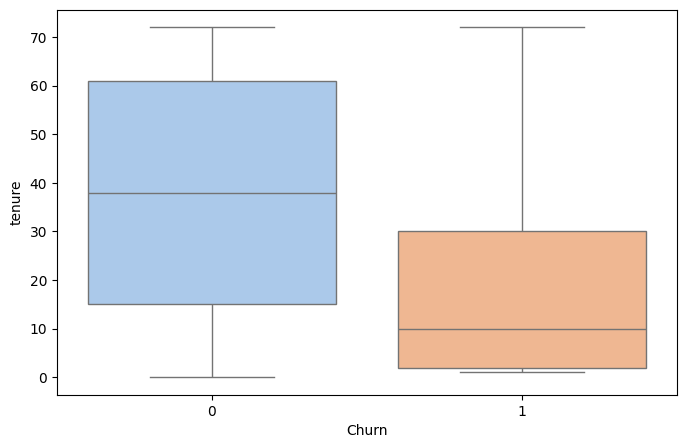

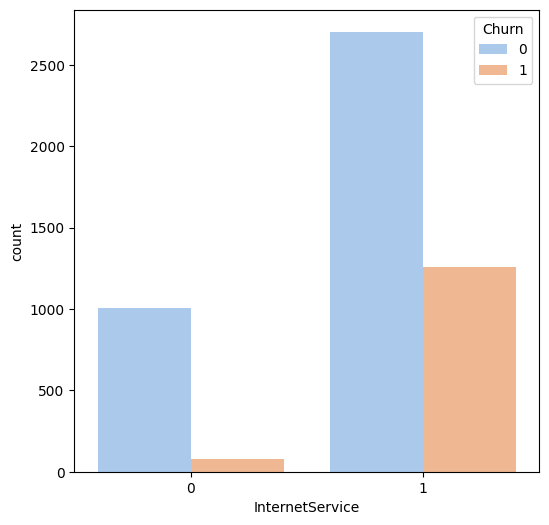

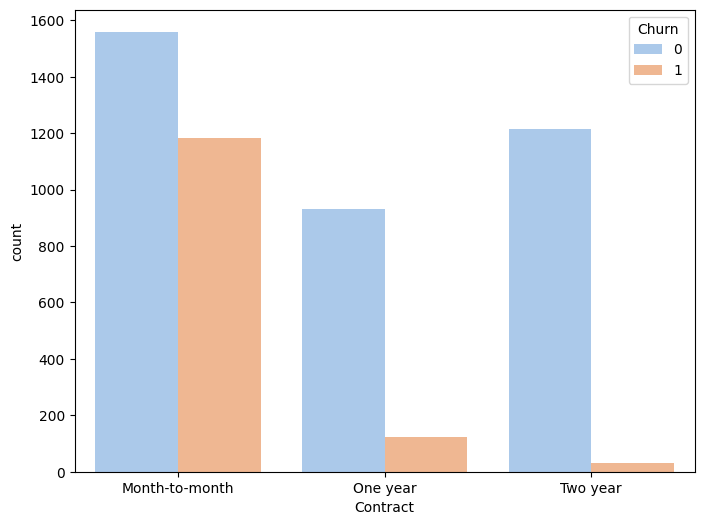

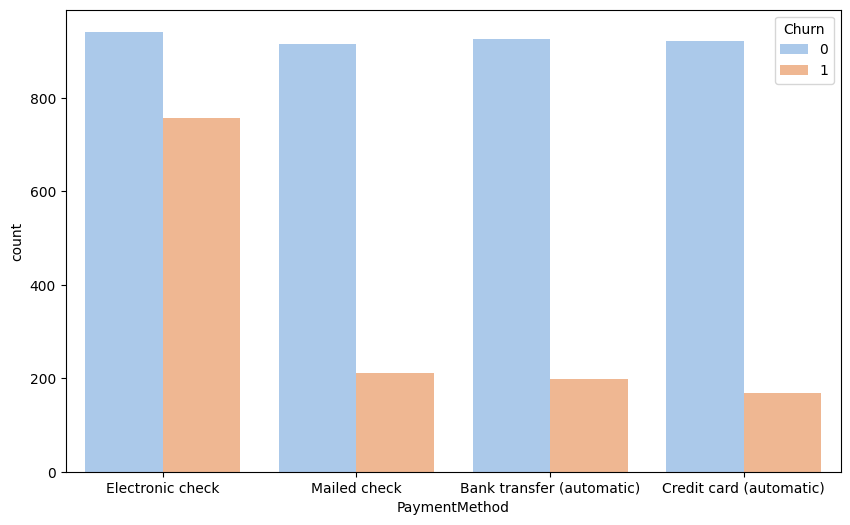

In [193]:


# 1. Total Churn Rate
plt.figure(figsize=(6, 6))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Total Churn Rate')
plt.ylabel('')


# 2. Effect of Boolean Attributes on Churn
boolean_attributes = ["Partner", "Dependents", "PhoneService", "MultipleLines", 
                      "OnlineSecurity", "DeviceProtection", "TechSupport", 
                      "StreamingTV", "StreamingMovies", "PaperlessBilling"]
plt.figure(figsize=(15, 15))
for i, attribute in enumerate(boolean_attributes, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=attribute, hue='Churn', palette='pastel')
   

# 3. Effect of Non-Boolean Attributes on Churn
non_boolean_attributes = ["InternetService", "Contract", "PaymentMethod"]
plt.figure(figsize=(15, 5))
for i, attribute in enumerate(non_boolean_attributes, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=attribute, hue='Churn', palette='pastel')

# 4. Effect of Numerical Attributes on Churn
plt.figure(figsize=(15, 5))
for i, attribute in enumerate(["MonthlyCharges", "TotalCharges"], 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=df, x='Churn', y=attribute, palette='pastel')

# 5. Effect of Tenure on Churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='tenure', palette='pastel')

# 6. Effect of Internet Service Type on Churn
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='pastel')

# 7. Effect of Contract Type on Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='pastel')

# 8. Effect of Payment Method on Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='pastel')

plt.show()


 ##### there are missing or whitespace values in the 'TotalCharges' column , which is causing the ValueError during the boxplot generation. To handle this issue, y drop or replace these problematic values before generating the visualization.

<Axes: >

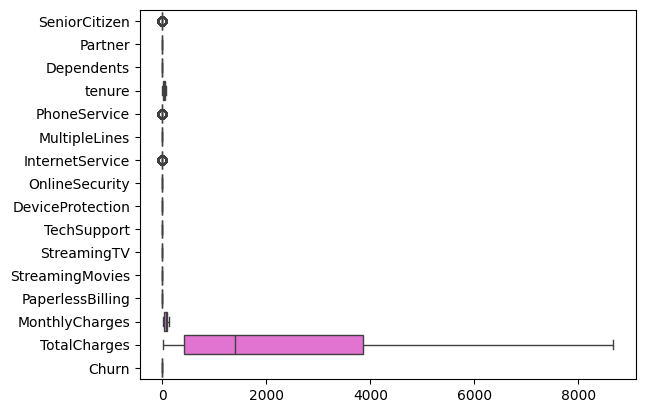

In [194]:
sns.boxplot(full_data, orient = 'h')

#### Drop MonthlyIncome and tenure

<Axes: >

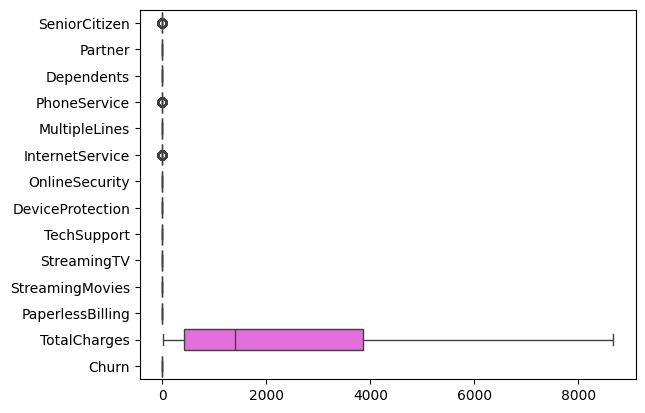

In [195]:
sns.boxplot(full_data.drop(['MonthlyCharges', 'tenure'],axis = 1), orient = 'h')

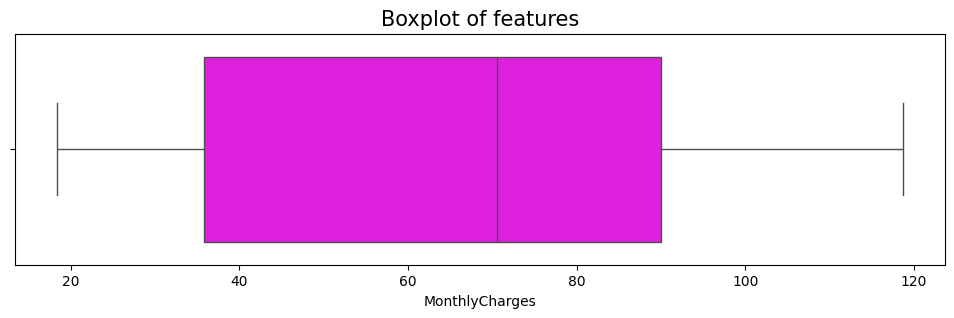

In [196]:
plt.figure(figsize = (12,3))
sns.boxplot(full_data['MonthlyCharges'], orient = 'h',color ='magenta')
plt.title('Boxplot of features',fontsize = 15)
plt.show()

In [198]:
#Show skewness
full_data.select_dtypes(include=['float']).skew()




MonthlyCharges   -0.238767
TotalCharges      0.945130
dtype: float64

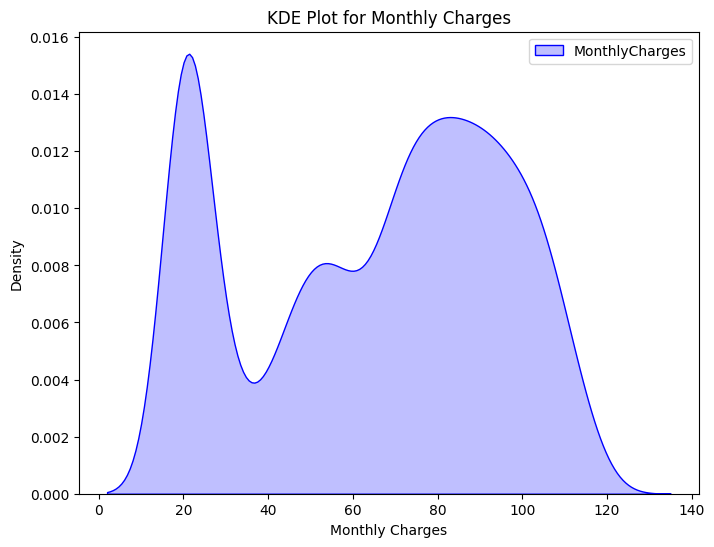

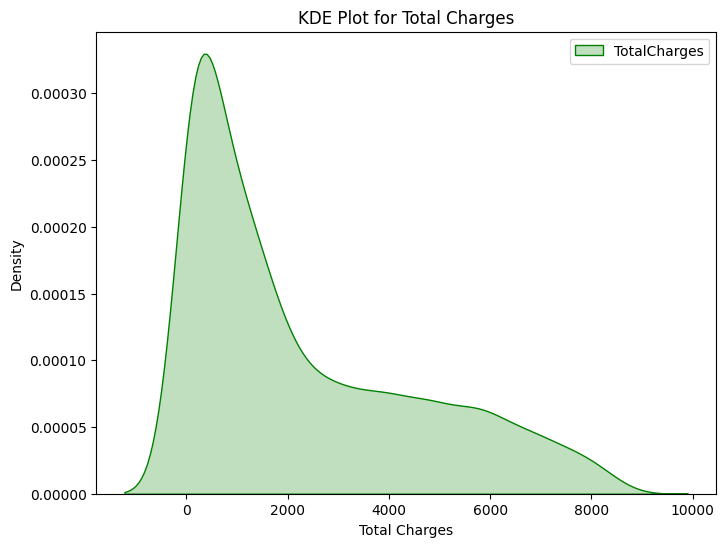

In [208]:
# Plotting MonthlyCharges
plt.figure(figsize=(8, 6))
sns.kdeplot(data=full_data['MonthlyCharges'], fill=True, color='blue', label='MonthlyCharges')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.title('KDE Plot for Monthly Charges')
plt.legend()
plt.show()

# Plotting TotalCharges
plt.figure(figsize=(8, 6))
sns.kdeplot(data=full_data['TotalCharges'], fill=True, color='green', label='TotalCharges')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.title('KDE Plot for Total Charges')
plt.legend()
plt.show()





In [210]:
#Show skewness
skew = full_data.select_dtypes(include=['float']).skew().sum()
print(f'The skewnes of the numerical features in the dataset is {round(skew, 2)}')

The skewnes of the numerical features in the dataset is 0.71


#### Key Insights
The entire dataset has a positive skewness withright tail of 0,72


## 2. MISSING VALUE COMPUTATION